# Домашнее задание 6: KMeans и картинки

Привет!

В этом задании мы напишем свой KMeans, разберёмся в особенностях его работы и применим его для сжатия картинок.


**Оформление дз**:
Присылайте выполненное на почту `mlphystech@gmail.com` файлы .pdf и .ipynb или ссылку на свой гитхаб.
В первой задаче требуется писать формулы - можно сделать это прямо в ноутбуке с помощью Latex, а можно прикрепить фотографию решения к заданию.

Вопросы можно присылать туда же, или в наш чат телеграма.

За это задание можно получить до 10 баллов (+5 бонусных).

**Дедлайн: 18 мая 23:59**

При составлении использованны материалы Stanford CS229.

## 0. Повторение

Давайте ещё раз вспомним, как работает KMeans:

**Входные данные:** $X$ - обучающая выборка

**Гиперпараметры:** $K$ - число извлекаемых кластеров, $\text{tol}$ - критерий остановки (см. далее) 

**Минимизируемая ошибка:** $\mathcal{L}(x) = \sum_{x \in X} \text{min}_{i=1,\ldots,K}\|x-c_i\|^2$, где $c_i$ - центр $i$-го кластера (проще говоря, сумма квадратов расстояний до ближайшего центра)

**Алгоритм:**

1. Выбрать из $X$ $K$ случайных объектов $(c_1, \ldots,c_K)$, и сделать их центрами кластеров.

1. Для каждого $i = 1, \ldots, K$ выбрать кластер $C_i$ как те точки из $X$, которые ближе всего к $c_i$.

1. Обновить центры кластеров: $c_i = \frac{1}{|C_i|}\sum_{x \in C_i}x$.

1. Повторять шаги $2$ и $3$ до тех пор, пока $\frac{\mathcal{L}{x}^{\text{new}}}{\mathcal{L}{x}^{\text{old}}}$ после очередного шага не станет меньше чем $(1 - \text{tol})$.

Пример работы с $K = 2$:

<img src="https://i.ytimg.com/vi/IJt62uaZR-M/maxresdefault.jpg" width="600">

## 1. Теория, или что нужно знать о KMeans

1. (3 балла) Давайте докажем, что KMeans действительно минимизирует $\mathcal{L}$, хотя бы в одномерном случае. Это проще увидеть так:
    
    1. (2 балла) Пусть $S$ - набор точек с центром масс $c_S$ (т.е. $c_S = \frac{1}{|S|}\sum_{x\in S}x$),
        тогда для любого $z$ верно равенство:
        
        $\sum_{x\in S}(x-z)^2 - \sum_{x \in S}(x - c_S)^2 = |S|(c_S - z)^2$.
        
        Это просто, не дайте обозначениям запутать вас! Например, начните с $S = 2$, а затем обобщите.
        
    1. (1 балл) Опираясь на п.A, докажите, что при переходе от шага $2$ к шагу $3$ ошибка действительно уменьшается.
    
1. (1 балл) Приведите пример, в котором KMeans достигает локального, но не глобального минимума $\mathcal{L}$. Можно ли как-то бороться с такой проблемой? Если можно, то как?

1. (1 балл) Где можно использовать KMeans, помимо сжатия картинок? Какие у него особенности (вам поможет картинка  с лекции с примерами работы: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html )?

**№1 - см. jpg-овские картинки с письменным решением**


**№2 - Заметим, что kMeans выбирает первые k точек случайным образом. Выбрав их, он начинает прогонять алгоритм до тех пор, пока
новые ci не станут совпадать со старыми, тогда он остановится. Проблема в том, что алгоритм может облажаться с выбором
начальных точек, в таком случае в какой-то момент он придёт в тупик - локальный минимум как бы достигнут, дальше улучшать нельзя,
kMeans завершает свою работу, но, так как начальные точки были выбраны случайно, молучившиеся разбиение неоптимально. Скорее всего,
при каком-то другом наборе случайных точек результат мог получиться лучше. Таким образом, получившийся минимум - локальный,
kMeans будет думать, что эту кластеризацию нельзя улучшить.     Я думаю, что это действительно серьёзная проблема. 
Как бы никому не нужный элемент случайности, который всё портит.  И эту задачу надо решать. Понятно, что до меня это уже поняли и всё сделали.  Как мне тут пропалили, есть специальные 
алгоритмы генерации начальных точек, которые чекают метрики ( как я понял, ф-и расстояний) и оптимально выбирают начальные точки
так, что алгоритм сходится лучше. Всё уже придумано. (Подробнее в п 3.3, KMeans++)**


**NEW**

Приведём пример. Пусть будет k начальных "кучек" и k кластеров. Чтобы алгоритм пришёл в локальный минимум, было бы неплохо,
например, если бы две кучки( или более, напр. n ) находились рядом друг с другом, при этом n-1 цетров кластеров были бы в какой-то из кучек или 
близко к ним, а ещё один - где-нибудь далеко ото всех кучек. Тогда получится, что алгоритм примет две(или более) находящиеся
рядом кучи за одну и будет стабильно называть цетром кластера одну из точек, принадлежащих пространству между двумя этими
кучками. При этом, заметим, та третья точка, которая по-хорошему должна была бы стать цетром одной из склеенных кучек,
будет играть роль центра какого-то несуществующего кластера, состоящего из очень разрозненных точек. При этом т.к. она будет
далеко от тех сросшихся куч, она, скорее всего, никак не сможет претендовать на право называться цетром одной из этих( склеенных) куч, т.к., вероятно,
ни один объект, этим кучам принадлежащий, не будет находиться к этой точке ближе, чем к центру  куч.

Пример, иллюстрирующий вышесказанное для k=3. Здесь две кучки не то, чтобы рядом, но, тем не менее, они ближе друг к другу, чем 
к изначальному третьему центру, так что прокатило.


<img src="https://image.ibb.co/bYrW7o/1.png" width="1000">
<img src="https://image.ibb.co/modYL8/2.png" width="1000">
<img src="https://image.ibb.co/naUvYT/3.png" width="1000">
<img src="https://image.ibb.co/kBOdno/4.png" width="1000">


**№3 - Как уже говорилось в лекции, можно с его помощью разделять людей на кластеры - группы. Приводился пример с какими-то 
новостными лентами. Можно, например, также разделять людей по тем или иным параметрам для разных задач - разделение
заключённых на различные группы, в какждой из которых присутствуют люди с наиболее схожими характеристикаи, т.е., предположительно,
похожим поведением... и прочее. Например, представим задачу. Лектору Семенову необходимо разбить студентов на группы так, чтобы
в каждой группе силы студентов были более или менее равны - тогда у каждой группы будет шанс решить поставленную профессором
задачу. Для этого преподаватель решил кластеризировать студентов с помощью kMeans. Он в течение нескольких лет кропотливо
собирал и систематизировал информацию об учащихся. Теперь с помощью упомянутого алгоритма он сможет кластеризировать студентов -
разбить их на группы с более или менее похожими людьми в составе этих кластеров. После этого Семенов сможет образовать
новые группы, в каждую из которых он будет стараться назначить примерно по одному студенту из каждого кластера. Тогда
распределение получится более или менее равномерным, силы соревнующихся будут примерно равны. Можно придумать ещё массу задач
подобного рода.**


**Пару слов об особенностях. Как уже говорилось, имеется некоторый элемент случайности в выборе начальных точек,
поэтому вообще не факт, что полученные результаты будут оптимальны. Кроме того, имеется нерегулируемый алгоритмом показатель
k - его надо либо задать случайно, что плохо, либо с помощью анализа/интуиции/помощи свыше каким-то образом получить оптимальное 
k, а это, в свою очередь, скорее всего подразумевает совершение какой-то дополнительной работы. Этот алгоритм, в принципе,
хорошо работает для близких групп объектов - он всё равно сможет разбить их на кластеры, даже если эти кластеры практически
склеены ( разумеется, если k подобрано адекватно ), как я понял, далеко не все алгоритмы способны на такое. Но проблема в том,
что разбиение также получается почти линейным - как-то проведена секущая плоскость - получается, что, если объекты одного класса
как-то смешиваются с объектами другого, алгоритм терпит фиаско, это довольно сильно ограничивает возможности его применения.**

## 2. Практика

**Задание**

1. Реализуйте свой KMeans, написав методы класса CustomKMeans. Некоторые функции реализованны за вас. Можно пользоваться методом euclidean_distances из sklearn.metrics. **Не пишите циклы по элементам выборки X.** Внимательно читайте комментарии!
1. (3 балла) Сравните свой KMeans с "табличным" на паре примеров и получите схожие результаты:
    1. (1 балл) На примере с "пятнами" make_blobs.
    1. (2 балла) На более сложном примере с make_circles (вам поможет ваш ответ в задаче $2$ первой части).

**Не меняйте код в ячейках с созданием выборок $X$ и их отрисовкой!**

In [1]:
import numpy as np
from sklearn.base import ClusterMixin
from sklearn.metrics import euclidean_distances

In [26]:
class CustomKMeans(ClusterMixin):
    """
    KMeans кластеризация, схему работы см. в п.0 
    
    Параметры:
    ----------
    
    n_clusters : int, optional, default: 8
        Число кластеров, K в обозначениях п.0
    
    max_iter: int, default: 300
        Максимальное число итераций
    
    tol: float, default: 0.0001
        Критерий остановки
    
    random_state: int, optional, default: 42
        Число для генератора, выбирающего первоначальные центры
    
    Атрибуты:
    ----------
    
    cluster_centers_: array, [n_clusters, n_features]
        Координаты центров кластеров или c_i в обозначениях п.0
    
    labels_: array, [n_examples, ]
        Метки кластера для каждого элемента X
    
    inertia_: float
        Текущее значение минимизируемой ошибки L
    
    """
    

    
    def __init__(self, n_clusters=8, max_iter=300, tol=1e-4, random_state=12):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.inertia_  = 1e10
        
        
    
    def fit(self, X):
        """
        Вычислить центры кластеров с помощью KMeans
        
        Вход:
        ----------
        X: array, [n_examples, n_features]
            Обучающая выборка
        
        Возвращаемое значение:
        ----------
        self: CustomKMeans class
            Обученный класс
        """
        def L(x, centres):
            distance= euclidean_distances(centres, X)
            distance.sort(axis=0)
            return sum(distance[0]) # сумма минимальных расстояний
        #**инициализируемся**                                    
        self.init_clusters(X)
        for i in range(self.max_iter):
            #**что-то делаем**
            l0=L(X, self.cluster_centers_)
       
            self.update_clusters(X)

            self.update_centers(X)
            l1=L(X, self.cluster_centers_)
            if l1/l0>1-self.tol: #                                     
                break
        return self
    def predict(self, X_new):
        """
        Вернуть метки для новой выборки X_new
        
        Вход:
        ----------
        X_new: array, [n_examples, n_features]
            Тестовая выборка
        
        Возвращаемое значение:
        ----------
        preds: array, [n_examples, ]
            Предсказанные метки классов
        """
        distances=euclidean_distances(self.cluster_centers_, X_new)
        return distances.argmin(axis=0)

    
    def fit_predict(self, X):
        """
        Вычислить центры кластеров с помощью KMeans и вернуть метки
        
        Вход:
        ----------
        X: array, [n_examples, n_features]
            Обучающая выборка
        
        Возвращаемое значение:
        ----------
        labels_: array, [n_examples, ]
            Метки кластера для каждого элемента X
        """
        return self.fit(X).labels_
    
    def init_clusters(self, X):
        """
        Случайная инициализация центров
        
        Вход:
        ----------
        X: array, [n_examples, n_features]
            Обучающая выборка
            
        Возвращаемое значение:
        ----------
        None
        """
        # Немного магии...
        np.random.seed(self.random_state)
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.n_clusters, replace=False), :]
    
    def update_clusters(self, X):
        """
        Обновить метки, к каким кластерам принадлежат элементы обучающей выборки, п.2
        
        Вход:
        ----------
        X: array, [n_examples, n_features]
            Обучающая выборка
        
        Возвращаемое значение:
        ----------
        None
        """
        distances=euclidean_distances(self.cluster_centers_, X)
        self.labels_=distances.argmin(axis=0)    
        #**Обновляем метки**    

    def update_centers(self, X):
        """
        Обновить центры каждого кластера, п.3
        
        Вход:
        ----------
        X: array, [n_examples, n_features]
            Обучающая выборка
        
        Возвращаемое значение:
        ----------
        None
        """   
        # первым делом надо с помощью меток кластеров получить кластеры, потом для них найти новые центры
        cluster_centers_=[]
        for i in range(self.n_clusters):
            claster=X[self.labels_==i,:]
            ci=sum(claster)/len(claster)           
            cluster_centers_.append(ci)
        self.cluster_centers_=np.array(cluster_centers_)
        #**Обновляем центры кластеров**


In [27]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans
%matplotlib inline
# Простой пример для дебага

colors = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf'])

def plot_comparison(X, labels1, labels2):
    plt.figure(figsize=(16,4))
    plt.subplot(131, title='My KMeans')
    plt.scatter(X[:,0], X[:,1], c=colors[labels1])
    
    plt.subplot(132, title='Default KMeans')
    plt.scatter(X[:,0], X[:,1], c=colors[labels2])
    plt.show()

ex_X_1, _ = make_blobs(n_samples=300, random_state=42)

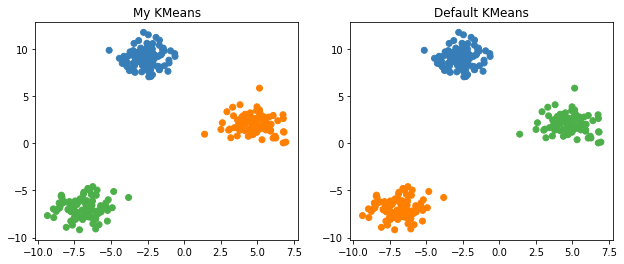

In [28]:
my_preds = CustomKMeans(n_clusters=3).fit_predict(ex_X_1) #**Предсказания нашей модели**
def_preds = KMeans(n_clusters=3).fit_predict(ex_X_1)

plot_comparison(ex_X_1, my_preds, def_preds)

In [29]:
# Пример чуть сложнее
ex_X_2, _ = make_circles(n_samples=300, factor=0.5, noise=0.08)

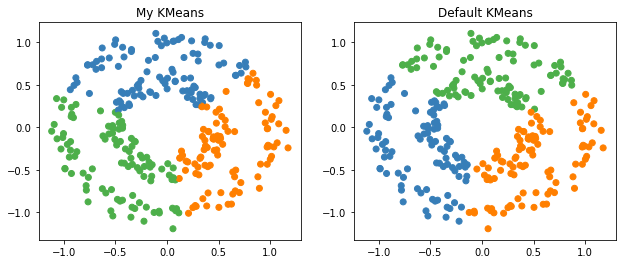

In [30]:
my_preds = CustomKMeans(n_clusters=3).fit_predict(ex_X_2)
def_preds = KMeans(n_clusters=3).fit_predict(ex_X_2)

plot_comparison(ex_X_2, my_preds, def_preds)

**Как видно, My KMeans распределил всё, по сути, так же, как Defalult. ( Как бы немного распределение по кругу съехало,
но неважно, в любом случае всё одинаково неправильно как у MY, так и у DEFAULT.) Примечание - немного "поехавший" круг возник,
                                                                        т.к. мой KMeans, вдиимо, просто выбрал немного другие
                                                                        случайные начальные точки - поэтому сошёлся слегка в других точках.**

## 3. Применение

Давайте научимся сжимать картинки с помощью KMeans.

Скачаем несколько примеров:
(если wget и mkdir не работают, надо а) создать папку img в той же директории и б) перейти по ссылкам и скачать картинки)

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances
from sklearn.utils import shuffle

from matplotlib.image import imread, imsave

In [32]:
!mkdir img
!wget -O img/im_ex_1.jpg# https://i.ytimg.com/vi/I2xVR_aFtj8/mqdefault.jpg
!wget -O img/im_ex_2.jpg# https://lh3.googleusercontent.com/WSSVT4FQK0XSADAQ2d63GdAxn_8FUkYM4LScSHonpEA=w320-h180-p
!wget -O img/im_ex_3.jpg# http://i1.wp.com/ytimg.googleusercontent.com/vi/sBOtC5jNmHk/mqdefault.jpg
# В общем, качаем

Џ®¤Ї ЇЄ  Ё«Ё д ©« img г¦Ґ бгйҐбвўгҐв.
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Пример картинки:

<img src="img/im_ex_2.jpg" width="600">

В чём идея? Каждая из трёх картинок имеет разрешение 320x180 в 24-битном цвете.

Это значит, что для каждого из 57600 пикселей есть три 8-битных числа (от 0 до 255), отвечающие за интенсивность красного, зелёного и синего цветов. В таком представлении картинка весит 57600x3=172800 байтов.

Мы сожмём картинку так, чтобы каждый пиксель имел один из 8-ми цветов. Для этого, мы представим её как обучающую выборку размерности (320x180,3) и сделаем кластеризацию на 8 классов.

**Задание:**

1. (2 балла) Проделайте это. Выгрузка картинки и отрисовка уже реализованны. Сравните результаты вашего KMeans с "табличным" и со случайной кластеризацией.
1. (\*) (2 балла) Попробуйте другие методы кластеризации вместо KMeans, например DBSCAN или Agglomerative Clustering. Какой из них даёт лучшей результат?
1. (\*) (3 балла) Почему ваш метод работает сильно хуже, чем библиотечный? Разберитесь, что такое KMeans++, и чем он помогает(вам потребуются знания теории вероятности).

In [33]:
def get_and_show_img(img_path, show=True):
    """
    Выгрузка картинки
    """
    original_img = imread(img_path)
    
    if show:
        plt.imshow(original_img)
        plt.show()
        print('Shape:', original_img.shape)
    return original_img

def get_rand_pred(original_img, n_colours=8):
    """
    Случайная кластеризация
    """
    X_true = original_img.reshape((-1,3)) # представляем как массив (i*j, 3) - набор из массивов 1*3, где 3 цвета
    
    random_centers = shuffle(X_true, random_state=42)[:n_colours] # shuffle - всё перемешал с ключом 42, взяли первые n_ точек
    
    y_random = pairwise_distances_argmin(random_centers, X_true, axis=0)
    # сначала он как бы находит евклидовы расстояния, потом выдаёт номера мин. знач в каждом столбце. То же самое, что делали
    # в My Keams с евклидовыми расстояними. Т.е., по сути, определяет кластер, к которому принадлежит точечка.
    # Обратите внимание на np.uint8 - он нужен, чтобы matplotlib нарисовал всё без ошибок
    return random_centers[y_random].reshape(original_img.shape).astype(np.uint8)
# Вот тут кое-что интересненькое. У нас в y_random лежат номера кластеров. Беря random_centres[y_random], мы как бы
#возвращаем список из всех точек(начальных), каждая из которых становится равной центру своего кластера. Тут реализована прикольная
# штука. Оказывает, в numpy можно сколько угодно брать объекты по индексу. т.е. если a=np.array([3,6,9]),то
# a[[3,3,3,3,2,2]] == [9,9,9,9,6,6]. Т.е. можно сколько угодно обращаться к одному объекту и вызывать его! А в 
# дефолтном питоне так делать нельзя (((! Здесь это даёт возможность вот так коротенько всё написать. Получается здорово!

In [37]:
def get_def_kmeans_pred(original_img, n_colours=8):
    """
    "Табличный" KMeans
    """
    # В общем - то, повторяем то, что было в get_rand_pred, но с поправкой на то, что мы уже не тыкаем пальцем в небо, а делаем нормальную крастеризацию
    X = original_img.reshape((-1,3))
    k=KMeans(n_clusters=n_colours).fit(X)
    y=k.predict(X)
    centres=k.cluster_centers_
    return centres[y].reshape(original_img.shape).astype(np.uint8)

def get_my_kmeans_pred(original_img, n_colours=8):
    """
    Кастомный KMeans
    """
    #Абсолютно то же самое, просто заменяем KMeans на CustomKMeans
    X = original_img.reshape((-1,3))
    k=CustomKMeans(n_clusters=n_colours).fit(X)
    y=k.predict(X)
    centres=k.cluster_centers_
    return centres[y].reshape(original_img.shape).astype(np.uint8)

In [41]:
# Получаем предсказания для трёх картинок
n_pictures = 3
n_colours = 8
all_img = []

for i in range(n_pictures):
    original_img = get_and_show_img('img/im_ex_'+str(i+1)+'.jpg', show=False)
    all_img += [original_img]
    original_img=original_img.astype(np.uint32)                                                     #NEW!!!!!
    def_kmeans_pred = get_def_kmeans_pred(original_img, n_colours)
    all_img += [def_kmeans_pred]
    
    my_kmeans_pred = get_my_kmeans_pred(original_img, n_colours)
    all_img += [my_kmeans_pred]
    
    rand_pred = get_rand_pred(original_img, n_colours)
    all_img += [rand_pred]

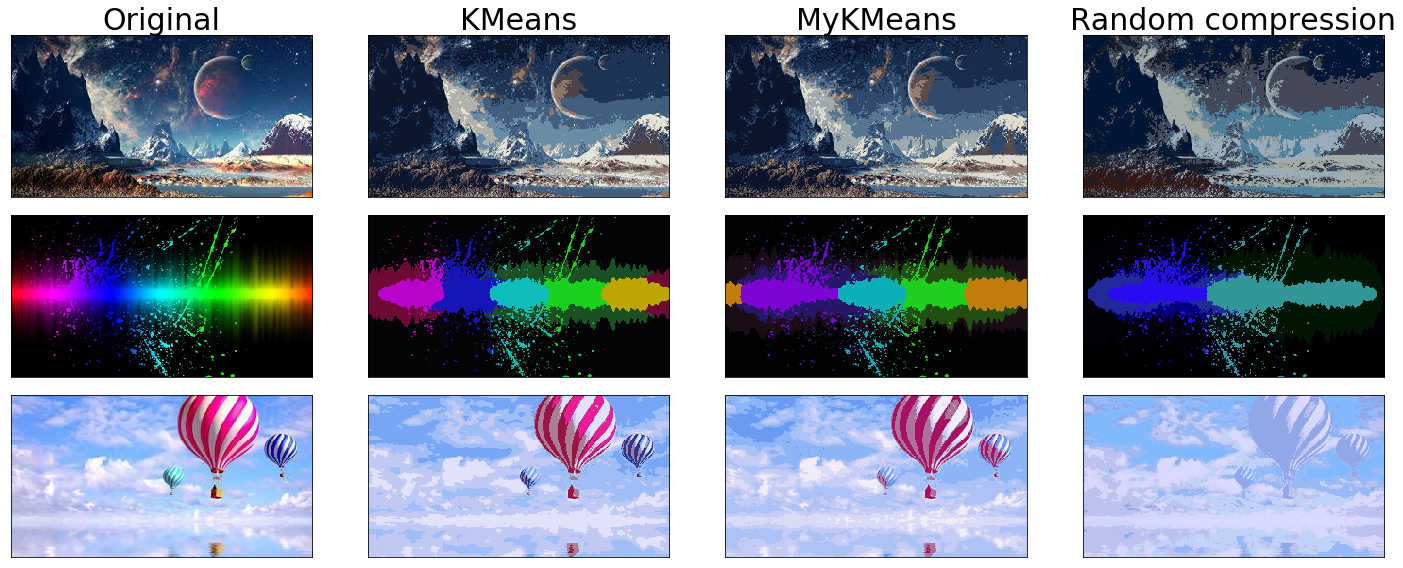

In [42]:
# Рисуем картинку
fig, axarr = plt.subplots(nrows=n_pictures, ncols=4, sharex=True, figsize=(20,8))

for ax, col in zip(axarr[0], ['Original', 'KMeans', 'MyKMeans', 'Random compression']):
    ax.set_title(col, fontsize=30)

for i in range(n_pictures):
    for j in range(4):
        axarr[i,j].imshow(all_img[i*4 + j])
        axarr[i,j].get_xaxis().set_visible(False)
        axarr[i,j].get_yaxis().set_visible(False)
fig.tight_layout()
plt.show()

In [ ]:
#Task №3

**Действительно, заметно, что библиотечный kMeans разгаричивает белый, красный и синие цвета на шарике, в то время как
мой их несколько смазывает. Я бы не сказал, что это очень сильно хуже, но хуже.**

**Почему такое происходит? Как уже упомяналось ранее, мы выбираем начальные точечки случайно. За счёт это с большим шансом
мы приходим в локальный минимум. Это плохо, надо с этим что-то делать. Если посмотреть на документацию KMeans, можно найти
в ней такой параметр, как init - возможные значения - k-means++ или random ( можно ещё явно цетры задать ). Грубо говоря,
я реализовывал KMEeans, в котором начальные точки выбирались рандомно - random. Но в "табличном" KMEans по умолчанию
init= k-means++. За счёт этого качество значительно лучше. Почему? Давайте разбираться!**

** В стандартном KMEans нет уверенности, что мы действительно минимизируем ф-ю ошибки 
глобально, а не приходим к локальному минимуму. Необходимо как-то убрать элемент случайности. Как это часто и бывает,
об этом уже задумались умные люди до нас. Они придумали KMeans++. Этот алгоритм отличается от обычного KMeans тем, что 
начальные точки берутся неслучайным образом. Они высчитываются, после чего уже реализуется обычный KMeans.**

**В чём идея выбора начальных точек(центроидов)?.   У нас на каком-то шаге некоторое кол-во центроидов. Нам теперь нужно выбрать новый центроид так, чтобы он был наиболее отдалён от ближайшего к нему цетроида( Такое стремление очевидно - чем дальше
центроиды находятся друг от друга, тем лучше, ибо тогда начальные кластеры будут более или менее нормально распределены ). Если бы просто выбирали самые дальние каждый раз, у нас бы центроиды бы распределилсь по краям выборки, но это ужасно - очевидно, что центры располагаются  где-то ближе к центру. Получается, мы просто не можем взять крайние. Но мы же должны что-то выбрать? Тогда надо взять какой-нибудь новый цетроид. Причём мы выбирем его случайно, но так, чтобы он скорее оказался дальше от старого цетроида - т.е. мы стремимся выбрать точечку подальше, чтобы новый центр отдалялся от старого. Но, очевидно, скорее всего новый центр будет не на краю - т.е. вокруг него будут распределены какие-то точки,  и поэтому всё хорошо, это действительно похоже
на центр кластера.**

**Как это реализовано? Выбираем какую-то одну точечку случайно. Дальше поступаем следующим образом. До того , как мы найдём
k цетроидов, будем выбирать новые цетроиды, например, так. Высчитываем квадраты
расстояний от каждой точечки до ближайшего к ней центроида. Помним, что нам надо выбрать новый цетроид так, чтобы
он с большей вероятностью был дальше от ближайшего к нему центроида. Т.е. нам как-то надо сделать так, чтобы вероятность
выбора новой точки зависела от её расстояния. По ходу дела найдём сумму всех квадратов. Далее случайно зададим какую-то величину
от нуля до суммы всех квадратов. Потом будем снова складывать все квадраты расстояний до тех пор, пока высчитываемое
значение не станет больше полученного ранее случайно. Точка, соответствующая последнему добавленному в сумму квадрату и есть 
искомая. Почему это работает? Вот тут всё одновременно и очень интересно, и при это довольно просто. Для простоты объяснения
будет удобно представить себе числовую ось, на которой отложен отрезок от 0 до значения S - сумма всех квадратов, а также
обозначены точечки, соответствующие как бы значению суммы на каждой итерации прибавления сумм квадратов. Говоря русским языком,
мы берём по очереди все суммы квадратов ( от самой маленькой и по возрастанию ) и перемещаемся по числовой оси вперёд,
каждый раз откладывая новый отрезочек с длиной, равной текущему квадрату. Теперь перед каждой точкой ( до предыдущей ) лежит 
отрезок, равный квадрату расстояния от этой точки до ближайшего к ней центроида. Далее мы на этой числовой оси
совершенно случайно выбираем одну точку P в интервале [0; S). Очевидно, P должна была попать в какой-то из
интервалов перед точечками. Очевидно, что чем длиннее интервал, тем с болей вероятностью P будет ему принадлежать. А поскольку
мы выбираем точечку, которой соответсвует свой собственный интервал, а длина этого интервала есть квадрат расстояния
от этой точки до цетроида, то вероятность выбора точки ( = вероятност выбора интервала перед ней ) прямо пропорциональна
квадрату расстояния от этой точки до ближашего цетроида.** ** Абстрагируемся от "костыля" в виде числовой оси. Пусть у нас
квадрат расстояния от какой-то точки до ближайшего центроида равен x()i. Тогда вероятность, что эта точка будет выбрана,
равна x(i)/S, так как эта точка будет выбрана только в том случае, если S>x(1)+x(2)+....x(i-1) ( если меньше, выберется
точка i-1 или ещё меньше ), а также если S<=x(1)+...+x(i)+x(i+1) ( если это не так, выберется точка i+1 или больше). Получается, что
    S лежит между x(1)+...x(i-1) и x(1)+...+x(i-1) + x(i)+x(i+1), т.е. длина допустимого отрезка S равна 
    (x(1)+...+x(i-1) + x(i)) - ( x(1)+...x(i-1)) = x(i). Тогда вероятность выбора именно этого отрезка равна x(i)/S ( на всю
                                                                                                                    длину).
Как - то так. Надеюсь, суть рассуждения понятна!**

**Подводя итог, можно сказать, что KMeans++ делает элемент случайности как бы меньше ( грубо говоря, у нас по-прежнему
используются радномные значения, но делается это по-умному ). Хотя один ( первый ) центроид по прежнему выбирается рандомно,
другие же распределяются более или менее нормально, и это сильно лучше, чем когда все тупо берутся рандомно.
И результат достаточно явно заметен. Достаточно сравнить качество изображения KMeans и My_KMeans в пред пунктке ( в первом
случае используется KMeans++ , во втором нет. Сильный косяк виден, например, на второй картинке - переход от розового
к синему для ++ выполнен нормально - розовое пятно, потом синее пятно. Для random же, как видно, есть какое-то общее
сине-розовое ( ~~ фиолеотовое ) пятно на месте синего и розового цвета. Эту кляксу обрамляет ещё одна тёмно-синяя. Т.е., по сути,
оба ( ++ and random ) разбили эти точки на два кластера, но первый справился с задачей неплохо - он нашёл действительно
основные цвета, второй же облажался - из-за какого-то странного выбора начальных точек он выбрал два цвета, которые
однозначно не являются основными**

In [7]:
#Task2
#Попробуем сравнить использование DBSCAN и Agglomerative Cl.

**Предисловие. В ходе эксперимента у меня возникли некоторые проблемы. Так, например, Agglomerative Clustering просто отказывался обрабатывать
большие изображения ( большие объёмы данных ) и выдавал Memory Error. Это абсолютно точно связано с размером данных, а не с 
количеством различных векторов, присутствующих в выборке. Таким же способом, к слову, меня посылали Affinity Propogation, 
Spectlar Clustering, Ward. Я видел лишь один выход, и мною было принято волевое решение - обрезать изображение. Я посчитал,
что даже с кусочком изображения можно провести эксперимент. Количество пикселей стало равно 22500, что по-прежнему немало. 
Я взял центральные части изображений - те, на которых было больше всего цветов. Если был какой-то умный и более эффективный
способ справиться с этой задачей, пожалуйста скажите мне об этом. Я абсолютно ясно понимаю, что в реальности нельзя было
бы просто взять и удалить половину датасета, поэтому такое решение кажется мне варварским. Теперь несколько слов о DBSCAN. Я 
постарался снизить количество кластеров, регулируя параметра eps - как я понял, это предельное расстояние, на котором
могут находиться объекты, чтобы их назвать соседями. Я пытался оптимизировать следующее. С одной стороны, количество кластеров 
( находил как len(np.unique(pred)) ) должно быть не очень большим - понятно, что, если кластеров много, это, по сути, почти
нормальное изображение. Но, когда я стремился снизить количество кластеров, обычно получалось, что создавался один большой
кластер, в котором были почти все точки - тогда изображение, грубо говоря, получалось монотонным. Это отвратительно,
поэтому я стремился, чтобы в самом большом кластере было меньше точек (чекал len(pred[pred==0]) ). С другой стороны,
также мало точек должно было быть определено, как точки без кластера  - самостоятельные ( чекал len(pred[pred==-1]) ).
Я попытался для каждого изображения подобрать лучшее eps, при котором бы всё было не так уж плохо, существовал
 какой-то баланс между этими тремя параметрами. Я сомневаюсь, что я дейсвтительно подобрал какие-то оптимальные параметры,
    однако при них алгоритм работал лучше, чем при стандартных значениях. Поэтому буду считать, что работа проделана не зря. 
**


In [170]:
from skimage.measure import compare_ssim
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import dbscan

def get_acl_pred(original_img, num):
    """
    "Табличный" Aggl. Cl.
    """
    X = original_img.reshape((-1,3))
    k=AgglomerativeClustering(n_clusters=num).fit(X)
    #y=k.predict(X)
    #centres=k.cluster_centers_
    pred=k.labels_
    n_clusters=len(np.unique(pred))
    for i in range(n_clusters):
        claster=X[pred==i]
        ci=sum(claster.astype(np.uint32))/len(claster)
        X[pred==i]=ci
    return X.reshape(original_img.shape).astype(np.uint8)

def get_dbscan_pred(original_img, e):
    """
    "Табличный" DBSCAN
    """
    X = original_img.reshape((-1,3))
    k=dbscan(X, eps=e) 
    #y=k.predict(X)
    #centres=k.cluster_centers_
    pred=k[1]
    n_clusters=len(np.unique(pred))
    for i in range(-1, n_clusters-1):
        claster=X[pred==i]
        ci=sum(claster.astype(np.uint32))/len(claster)
        X[pred==i]=ci
    return X.reshape(original_img.shape).astype(np.uint8), len(np.unique(pred))

IMAGE 1
Num of Agglomerative and kMeans clusters:8
Num of dbscan clusters:158
Comparing original and KMeans images
0.867528795202
Comparing original and Agglomerative Clustering images
0.857340107987
Comparing original and DBSCAN images
0.628068498441

IMAGE 2
Num of Agglomerative and kMeans clusters:8
Num of dbscan clusters:166
Comparing original and KMeans images
0.735002020038
Comparing original and Agglomerative Clustering images
0.775523940666
Comparing original and DBSCAN images
0.530155948854

IMAGE 3
Num of Agglomerative and kMeans clusters:8
Num of dbscan clusters:75
Comparing original and KMeans images
0.899688908008
Comparing original and Agglomerative Clustering images
0.885300133148
Comparing original and DBSCAN images
0.759678020288



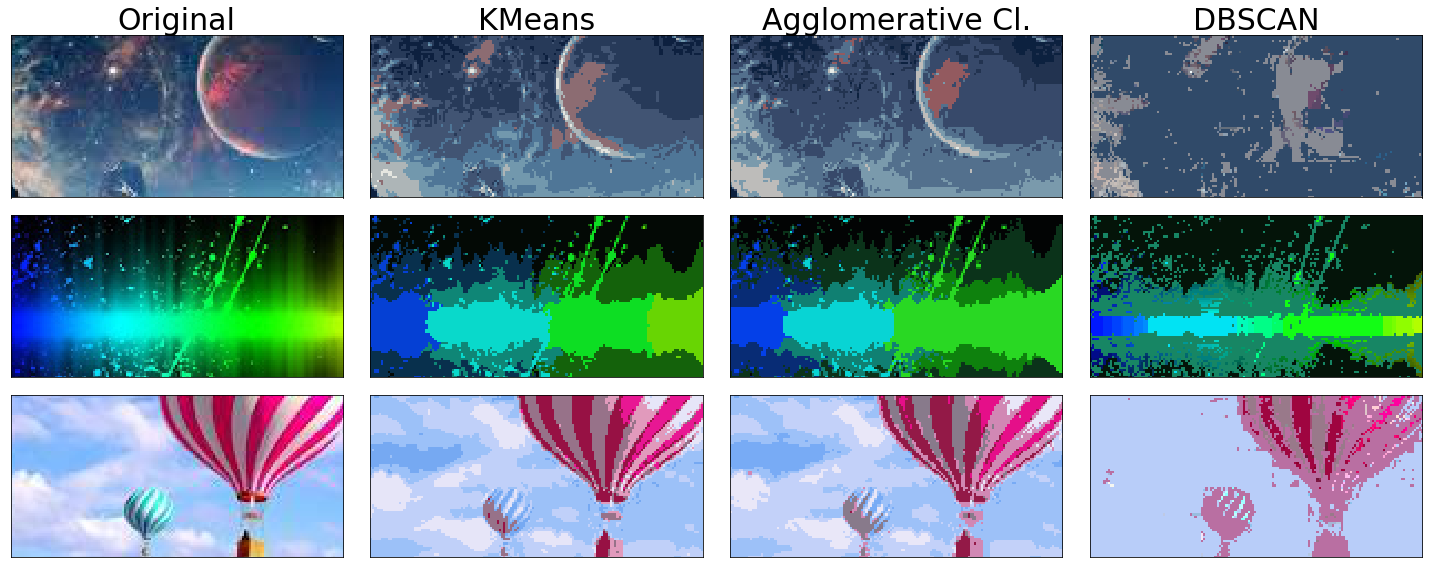

In [179]:
all_img=[]
for i in range(1,4):
    num=8
    img=imread('img/im_ex_' + str(i)+'.jpg')
    img=img[0:150, 110:260] # При немного больших размерах изображения Aggl. Clast. просто творит насилие над моим
    # компьютером. При сильно больших выдаёт Memory Error. Dbscan тоже с радостью присоединяется к Aggl.Cl. Так что 
    # лучше урезать размер изображения и сравнить уже так. На мой взгляд, результат должен быть ~ тем же
    img_acl= get_acl_pred(img, num )
    if i==1:
        eps=3
    elif i==2:
        eps=4
    elif i==3:
        eps==2
    img_dbscan, n_cl= get_dbscan_pred(img, eps)        
    img_kmeans = get_def_kmeans_pred(img)
    print('IMAGE '+str(i) )
    print('Num of Agglomerative and kMeans clusters:' + str(num))
    print('Num of dbscan clusters:' + str(n_cl))
    print('Comparing original and KMeans images')
    print(compare_ssim(img, img_kmeans, win_size=3))
    print('Comparing original and Agglomerative Clustering images')
    print(compare_ssim(img, img_acl, win_size=3))
    print('Comparing original and DBSCAN images')
    print(compare_ssim(img, img_dbscan, win_size=3))
    print('')# отступ
    all_img+=[img,img_kmeans, img_acl, img_dbscan]
n_pictures = 3
fig, axarr = plt.subplots(nrows=n_pictures, ncols=4, sharex=True, figsize=(20,8))

for ax, col in zip(axarr[0], ['Original','KMeans', 'Agglomerative Cl.', 'DBSCAN']):
    ax.set_title(col, fontsize=30)

for i in range(n_pictures):
    for j in range(4):
        axarr[i,j].imshow(all_img[i*4 + j])
        axarr[i,j].get_xaxis().set_visible(False)
        axarr[i,j].get_yaxis().set_visible(False)
fig.tight_layout()
plt.show()


**Давайте разберёмся, что получилось. При сравнении качества изображений я также использовал метрику compare_ssim - так было 
проще сделать какие-то выводы. Замечу, что количество кластеров для KMEans и Ag.Cl. фиксированное - 8, для DBSCAN же
я его попытался искусственно снизить. Что немного странно, KMEans и Ag. Cl. выдали примерно одинаковые результаты, хотя я был уверен,
что KMeans проиграет Aggl.Cl. Т.е. можно сделать вывод, что использование этих двух методов для данной задачи даёт
примерно одинаковые результаты. С Dbscan всё по-другому. Несмотря на то, что количество кластеров для него получилось довольно
большим, качество изображений осталяет желать лучшего. Учитывая, что количество кластеров у DBSCAN здесь значительно больше,
чем у KMeans и A.C., допустимо предположение, что Dbscan как-то не очень подходит для данной задачи. Понятно, что если бы 
не было стремления снизить кол-во кластеров, то качество получилось бы получше. Но имеем, что имеем. Я склоняюсь к мнению,
что для использования DBSCAN надо очень тонко настоить парметры eps и min_samples, чего у меня сделать не получилось. Очевидно
также, что в сравнении с Aggl. Cl. DBSCAN значительно проигрывает по качеству. Я думал получить другие результаты, но
случилось вот так.**

**Очень небольшой минивывод. Для разных типов задач, очевидно, подходят различные алгоритмы. У меня получилось так, что
KMeans оказался эффективнее DBSCAN, хотя, на мой взгляд, алгоритм DBSCAN посложнее и поинтереснее реализован, он должен бы
получше всё разделять, ан нет. Выходит, не стоит отбрасывать какой-то алгоритм, какую-то идею, даже если она кажется простой,
может статься, что более совершенный, продуманный, сложный алгоритм сработает хуже.**